# Data

In [1]:
from dataclasses import dataclass 

@dataclass
class Node:
    name: str
    attributes: list[str]
    children: list

    def add_child(self, node):
        self.children.append(node)
    def add_attr(self, attr: str):
        self.attributes.append(attr)

    def __hash__(self):
        return hash(self.name)

In [2]:
root = Node("Root", [], [])

mesure_instance = root

mesure_instance.add_attr("timestamp") 
mesure_instance.add_attr("instanceCode")
mesure_instance.add_attr("instanceType")

mesure_machine = Node("Resource", [], [])
mesure_machine.add_attr("used")
mesure_machine.add_attr("max")
mesure_machine.add_attr("usedRatio")
mesure_machine.add_attr("type")
mesure_instance.add_child(mesure_machine)


copilote = Node("Copilote", [], [])
mesure_instance.add_child(copilote)

espace_stockage = Node("Storage", [], [])
espace_stockage.add_attr("code") 
espace_stockage.add_attr("type")
espace_stockage.add_attr("used")
espace_stockage.add_attr("max")
espace_stockage.add_attr("usedRatio")
espace_stockage.add_attr("mount")
mesure_instance.add_child(espace_stockage)



gc = Node("GarbageCol", [], [])
gc.add_attr("code")
gc.add_attr("nb")
gc.add_attr("duration")
copilote.add_child(gc)

pda = Node("PDA", [], [])
pda.add_attr("code") 
pda.add_attr("nb")
copilote.add_child(pda)

scheduler_quartz = Node("QuartzJobs", [], [])
scheduler_quartz.add_attr("paused")
scheduler_quartz.add_attr("shutdown")
scheduler_quartz.add_attr("started")
scheduler_quartz.add_attr("nb")
copilote.add_child(scheduler_quartz)


In [3]:
top_processes = Node("TopProcess", [], [])
top_processes.add_attr("top10")
top_processes.add_attr("rank")
top_processes.add_attr("user")
top_processes.add_attr("uid")
top_processes.add_attr("pid")
top_processes.add_attr("cmd")
top_processes.add_attr("ram") 
top_processes.add_attr("cpu") 
top_processes.add_attr("vsz")
top_processes.add_attr("rss")
top_processes.add_attr("swap")
mesure_instance.add_child(top_processes)

top_processes_type = {"TopProcCpu", "TopProcVMem", "TopProcRam", "TopProcSwap"}
for process_type in top_processes_type:
    top_processes.add_child(Node(process_type, [], [])) 

ping = Node("Ping", [], [])
ping.add_attr("duration")
ping.add_attr("status")
ping.add_attr("code")
copilote.add_child(ping)

instance_audit_stat = Node("AuditStat", [], [])
instance_audit_stat.add_attr("metadataId") 
instance_audit_stat.add_attr("type") 
instance_audit_stat.add_attr("active") 
instance_audit_stat.add_attr("incremental") 
instance_audit_stat.add_attr("rank") 
instance_audit_stat.add_attr("nb") 
copilote.add_child(instance_audit_stat)

file_statistic = Node("FileStat", [], [])
file_statistic.add_attr("code")
file_statistic.add_attr("directory")
file_statistic.add_attr("used")
mesure_instance.add_child(file_statistic)



In [4]:
baseDonnee = Node("Database", [], [])
mesure_instance.add_child(baseDonnee)

mesure_BD = Node("DBPool", [], [])
mesure_BD.add_attr("used")
mesure_BD.add_attr("idle")
mesure_BD.add_attr("max")
mesure_BD.add_attr("usedRatio")
baseDonnee.add_child(mesure_BD)

tablespace = Node("DBTablespace", [], [])
tablespace.add_attr("type") 
tablespace.add_attr("code") 
tablespace.add_attr("used")
tablespace.add_attr("max")
tablespace.add_attr("usedRatio")
baseDonnee.add_child(tablespace)

table = Node("DBTable", [], [])
table.add_attr("code") 
table.add_attr("tableSize")
table.add_attr("indexSize")
table.add_attr("lobSize")
table.add_attr("sizeSum")
table.add_attr("changedBlocks")
table.add_attr("changedPercents")
table.add_attr("topSize")
table.add_attr("topLines")
table.add_attr("topTransactions")
table.add_attr("nbRows") 
baseDonnee.add_child(table)

instance_table_bdd = Node("DBInfo", [], [])
instance_table_bdd.add_attr("analysisObsoleteNb")
instance_table_bdd.add_attr("archiveLogsNb")
instance_table_bdd.add_attr("lastAnalysis")
instance_table_bdd.add_attr("userRecycleBinSize")
baseDonnee.add_child(instance_table_bdd)

bd_tablespace_sysaux = Node("DBSysOccupant", [], [])
bd_tablespace_sysaux.add_attr("code")
bd_tablespace_sysaux.add_attr("used")
baseDonnee.add_child(bd_tablespace_sysaux)

bd_killed_sessions = Node("DBKilledSessions", [], [])
bd_killed_sessions.add_attr("code")
bd_killed_sessions.add_attr("user")
bd_killed_sessions.add_attr("status")
bd_killed_sessions.add_attr("startTimestamp")
baseDonnee.add_child(bd_killed_sessions)

bd_archived_logs_per_object = Node("ArchivedLogsPerObj", [], [])
bd_archived_logs_per_object.add_attr("code")
bd_archived_logs_per_object.add_attr("id")
bd_archived_logs_per_object.add_attr("owner")
bd_archived_logs_per_object.add_attr("type")
bd_archived_logs_per_object.add_attr("dbBlockChanges")
bd_archived_logs_per_object.add_attr("rank")
bd_archived_logs_per_object.add_attr("percent")
baseDonnee.add_child(bd_archived_logs_per_object)


In [5]:
copilote_compteur = Node("CopiloteCounter", [], [])
copilote_compteur.add_attr("code")
copilote_compteur.add_attr("used")
copilote_compteur.add_attr("min")
copilote_compteur.add_attr("max")
copilote_compteur.add_attr("usedRatio")
copilote_compteur.add_attr("type")
copilote_compteur.add_attr("period")
copilote_compteur.add_attr("startTimestamp")
copilote_compteur.add_attr("endTimestamp")
copilote.add_child(copilote_compteur)

mesure_copilote = Node("CopiloteActivity", [], [])
mesure_copilote.add_attr("nb")
mesure_copilote.add_attr("nbSinceOneMinute")
copilote.add_child(mesure_copilote)

mesure_copilote.add_child(Node("ActiveSession", [], []))
mesure_copilote.add_child(Node("ActiveDaemon", [], []))


In [6]:

menu_items = Node("MenuItemStat", [], [])
menu_items.add_attr("endTimestamp")
menu_items.add_attr("code")
menu_items.add_attr("label")
menu_items.add_attr("duration")
menu_items.add_attr("focusDuration")
menu_items.add_attr("sessionId")
menu_items.add_attr("errorNb")
menu_items.add_attr("type")
menu_items.add_attr("user")
menu_items.add_attr("sourceId")
menu_items.add_attr("folderCode")
menu_items.add_attr("folderIk")
menu_items.add_attr("sourceId")
copilote.add_child(menu_items)


trace_audit = Node("TraceAudit", [], [])
trace_audit.add_attr("startTimestamp")
trace_audit.add_attr("updateTimestamp")
trace_audit.add_attr("code") 
trace_audit.add_attr("id")
trace_audit.add_attr("sessionId")
trace_audit.add_attr("trace")
trace_audit.add_attr("user")
trace_audit.add_attr("nb")
trace_audit.add_attr("entry")
trace_audit.add_attr("component")
trace_audit.add_attr("elementMetadata")
trace_audit.add_attr("elementEk")
trace_audit.add_attr("type")
trace_audit.add_attr("endTimestamp")
trace_audit.add_attr("folderCode")
trace_audit.add_attr("folderIk")
copilote.add_child(trace_audit)

In [7]:
oracle_session_hist = Node("ActiveSessHist", [], [])
oracle_session_hist.add_attr("type") 
oracle_session_hist.add_attr("nb") 
baseDonnee.add_child(oracle_session_hist)

In [8]:
mesure_heap = Node("CopiloteJmap", [], [])
copilote.add_child(mesure_heap)

heap_dump_global = Node("JmapInfo", [], [])
heap_dump_global.add_attr("status")
heap_dump_global.add_attr("objectNb")
heap_dump_global.add_attr("size")
heap_dump_global.add_attr("duration")
mesure_heap.add_attr("afterGC")
mesure_heap.add_attr("afterOOM")

mesure_heap.add_child(heap_dump_global)

heap_dump_detail = Node("ClassInfo", [], [])
heap_dump_detail.add_attr("code")
heap_dump_detail.add_attr("rank")
heap_dump_detail.add_attr("nb")
heap_dump_detail.add_attr("size")
mesure_heap.add_child(heap_dump_detail)

In [9]:
mesure_lucene = Node("Lucene", [], [])
mesure_lucene.add_attr("code")
copilote.add_child(mesure_lucene)

lucene_index_en_pause = Node("PausedIndex", [], [])
lucene_index_en_pause.add_attr("cause")
lucene_index_en_pause.add_attr("user") 
lucene_index_en_pause.add_attr("waitingTaskNb")
lucene_index_en_pause.add_attr("startTimestamp")
lucene_index_en_pause.add_attr("duration")

mesure_lucene.add_child(lucene_index_en_pause)

lucene_doc_en_attente = Node("WaitingDoc", [], [])
lucene_doc_en_attente.add_attr("metadataId")
lucene_doc_en_attente.add_attr("nb")
mesure_lucene.add_child(lucene_doc_en_attente)

lucene_job_en_cours = Node("CurrentJob", [], [])
lucene_job_en_cours.add_attr("nb")
lucene_job_en_cours.add_attr("startTimestamp")
mesure_lucene.add_child(lucene_job_en_cours)

lucene_index_taille = Node("IndexSize", [], [])
lucene_index_taille.add_attr("size")
mesure_lucene.add_child(lucene_index_taille)

In [10]:
infoserveur = Node("Infoserver", [], [])
infoserveur.add_attr("service")
infoserveur.add_attr("duration")
infoserveur.add_attr("sendingDuration")
infoserveur.add_attr("dumpLength")
infoserveur.add_attr("sessionId")
infoserveur.add_attr("parseRequestDuration")
infoserveur.add_attr("initRequestDuration")
infoserveur.add_attr("serializeReturnDuration")
infoserveur.add_attr("requestSize")
infoserveur.add_attr("responseSize")
infoserveur.add_attr("cpuTime")
infoserveur.add_attr("allocatedBytes")
infoserveur.add_attr("userTime")
infoserveur.add_attr("user") 
copilote.add_child(infoserveur)

raw_sql_requests = Node("SqlRequest", [], [])
raw_sql_requests.add_attr("dump")
raw_sql_requests.add_attr("rowNb")
raw_sql_requests.add_attr("request")
infoserveur.add_child(raw_sql_requests)

service_calls = Node("ServiceCalls", [], [])
service_calls.add_attr("description")
service_calls.add_attr("type")
infoserveur.add_child(service_calls)


In [11]:

sessions_copilote = Node("CopiloteSession", [], [])
sessions_copilote.add_attr("id")
sessions_copilote.add_attr("startTimestamp")
sessions_copilote.add_attr("user")
sessions_copilote.add_attr("rank")
sessions_copilote.add_attr("folderCode")
sessions_copilote.add_attr("auditModifNb")

copilote.add_child(sessions_copilote)

# DataViz

In [12]:
import pandas as pd

def create_df(root: Node, current_children: set) -> pd.DataFrame:
    children_dfs = []
    current_data = []
    for child in root.children:
        current_data.append([child.name, root.name, child.attributes]) 
        if child not in current_children: # au cas où un node peut avoir plusieurs parents
            current_children.add(child)
            children_dfs.append(create_df(child, current_children))

    current_df = pd.DataFrame(current_data, columns=["name", "parent",  "attributes"])

    return pd.concat([current_df] + children_dfs)

df_collects = create_df(root, set())

data = {"name": df_collects["name"].to_list(), "parent" : df_collects["parent"].to_list(), "attributes": df_collects["attributes"].to_list()}

In [13]:
import plotly.express as px 

fig2 = px.sunburst(data, names="name", parents="parent", color="parent", hover_data=["attributes"], width=700, height=700)
fig2.update_layout(font_size=18)
fig2.show()

# FCA

In [16]:
# on parcours le graph pour definir la matrice propriétés/objets (attributs/nom collecte)

def graph_DFS(current_node: Node, node_seen: dict, current_attributes: list):
    # on ajoute les attributs courants qui seront ajoutés au nodes enfants
    
    current_attributes.extend(current_node.attributes)

    # on ajoute le node courant que s'il est une feuille (sinon c'est une factorisation que rma a choisir arbitrairement)
    if current_node.name not in node_seen and len(current_node.children) == 0: 
        node_seen[current_node.name] = current_attributes.copy()
     
    for child in current_node.children:
        graph_DFS(child, node_seen, current_attributes)
    
    # on remonte dans le DFS, on eneleve ces attributs
    for elt in current_node.attributes:
        current_attributes.remove(elt)

matrix_dict = {}
graph_DFS(root, matrix_dict, [])    

# on nettoie en enlevant les elements qui ne sont pas des collectes concretes

print(matrix_dict)

{'Resource': ['timestamp', 'instanceCode', 'instanceType', 'used', 'max', 'usedRatio', 'type'], 'GarbageCol': ['timestamp', 'instanceCode', 'instanceType', 'code', 'nb', 'duration'], 'PDA': ['timestamp', 'instanceCode', 'instanceType', 'code', 'nb'], 'QuartzJobs': ['timestamp', 'instanceCode', 'instanceType', 'paused', 'shutdown', 'started', 'nb'], 'Ping': ['timestamp', 'instanceCode', 'instanceType', 'duration', 'status', 'code'], 'AuditStat': ['timestamp', 'instanceCode', 'instanceType', 'metadataId', 'type', 'active', 'incremental', 'rank', 'nb'], 'CopiloteCounter': ['timestamp', 'instanceCode', 'instanceType', 'code', 'used', 'min', 'max', 'usedRatio', 'type', 'period', 'startTimestamp', 'endTimestamp'], 'ActiveSession': ['timestamp', 'instanceCode', 'instanceType', 'nb', 'nbSinceOneMinute'], 'ActiveDaemon': ['timestamp', 'instanceCode', 'instanceType', 'nb', 'nbSinceOneMinute'], 'MenuItemStat': ['timestamp', 'instanceCode', 'instanceType', 'endTimestamp', 'code', 'label', 'duratio

In [17]:
df = pd.DataFrame(index=matrix_dict.keys(), columns=sorted(set(item for items in matrix_dict.values() for item in items)))
for key, items in matrix_dict.items():
    df.loc[key] = df.columns.isin(items).astype(int)
df = df.fillna(0).astype(int)

In [18]:
df.to_csv("FinalDataset.csv")


In [19]:
from concepts import Definition, Context

d = Definition()

for collecte, attributes in matrix_dict.items():
    d.add_object(collecte, attributes)

context = Context(*d)

In [21]:
dict_propriete = {}
for propriete in context.properties:
    dict_propriete[propriete] = len(context.extension([propriete]))


proprietes_extent_count = {k: v for k, v in sorted(dict_propriete.items(), key=lambda x: x[1], reverse=True)}
relations_sum = sum([v for k, v in proprietes_extent_count.items()])
print(proprietes_extent_count)

{'timestamp': 34, 'instanceCode': 34, 'instanceType': 34, 'code': 18, 'nb': 11, 'user': 11, 'type': 10, 'rank': 8, 'used': 7, 'duration': 7, 'startTimestamp': 6, 'max': 5, 'usedRatio': 5, 'sessionId': 4, 'top10': 4, 'uid': 4, 'pid': 4, 'cmd': 4, 'ram': 4, 'cpu': 4, 'vsz': 4, 'rss': 4, 'swap': 4, 'status': 3, 'endTimestamp': 3, 'folderCode': 3, 'id': 3, 'size': 3, 'metadataId': 2, 'nbSinceOneMinute': 2, 'folderIk': 2, 'afterGC': 2, 'afterOOM': 2, 'service': 2, 'sendingDuration': 2, 'dumpLength': 2, 'parseRequestDuration': 2, 'initRequestDuration': 2, 'serializeReturnDuration': 2, 'requestSize': 2, 'responseSize': 2, 'cpuTime': 2, 'allocatedBytes': 2, 'userTime': 2, 'paused': 1, 'shutdown': 1, 'started': 1, 'active': 1, 'incremental': 1, 'min': 1, 'period': 1, 'label': 1, 'focusDuration': 1, 'errorNb': 1, 'sourceId': 1, 'updateTimestamp': 1, 'trace': 1, 'entry': 1, 'component': 1, 'elementMetadata': 1, 'elementEk': 1, 'objectNb': 1, 'cause': 1, 'waitingTaskNb': 1, 'dump': 1, 'rowNb': 1, 

In [42]:
import pandas as pd
import plotly.express as px

# import matplotlib.pyplot as plt
# pour chaque rang dans les proprietes_extent_count triées, on calcul la couverture (proportion de relations couvertes)
cum_sum_relations = 0
nb_top_properties_vs_covered_relations = {"nb_top_properties": [], "covered_relations": []}

for i, (propriete, count) in enumerate(proprietes_extent_count.items()):
    cum_sum_relations += count
    nb_top_properties_vs_covered_relations["nb_top_properties"].append(i)
    nb_top_properties_vs_covered_relations["covered_relations"].append(cum_sum_relations / relations_sum * 100)

df = pd.DataFrame(data=nb_top_properties_vs_covered_relations)
# df.plot(x="nb_top_properties", y="covered_relations")
df.to_csv("covered_relations_posterior.csv")  
df["context"]="final context" 
df_prior=pd.read_csv("covered_relations_prior.csv") 
df_prior["context"] = "initial context"
df_union = pd.concat([df_prior,df], ignore_index=True)
px.scatter(df_union, x="nb_top_properties", y="covered_relations", color = 'context')




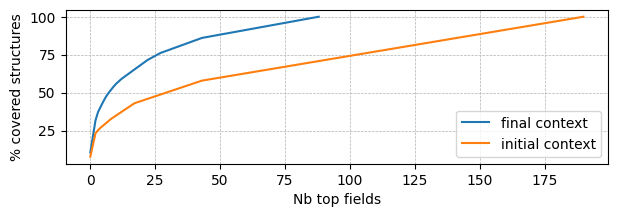

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 2))
for series_name, group in df_union.groupby('context'):
    plt.plot(group['nb_top_properties'], group['covered_relations'], label=series_name)

plt.xlabel('Nb top fields')
plt.ylabel('% covered structures')
plt.legend()
plt.grid(True)
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.show()

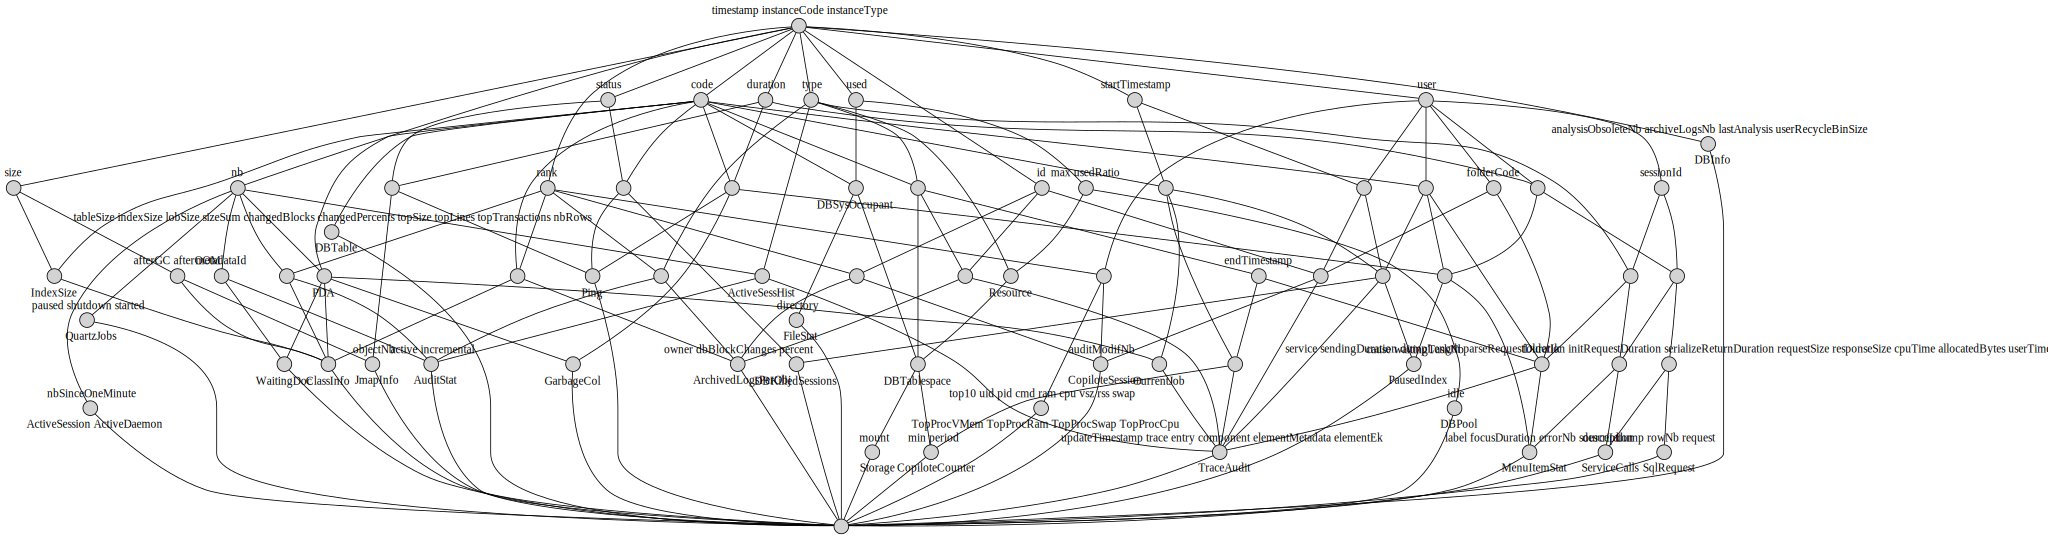

In [23]:
context.lattice.graphviz()